### THIS is try to get the acupoint from hand

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

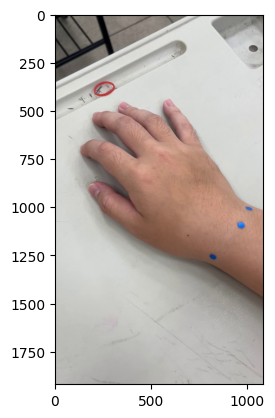

In [42]:
img = cv2.imread('datasets/hand/imgs/3115/0.jpg')
plt.imshow(img[:,:,::-1])

In [43]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

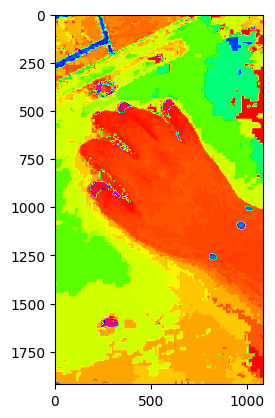

In [44]:
plt.imshow(hsv[:,:,0], cmap='hsv')

In [45]:
lower_blue = np.array([100, 50, 100])
upper_blue = np.array([130, 255, 255])

In [46]:
mask = cv2.inRange(hsv, lower_blue, upper_blue)

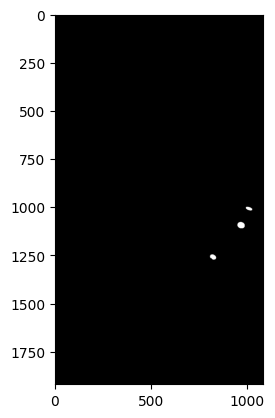

In [47]:
plt.imshow(mask, cmap='gray')

In [48]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [49]:
keypoints = []
for cnt in contours:
    M = cv2.moments(cnt)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    keypoints.append((cx, cy))

idx = 0
for kp in keypoints:
    cv2.circle(img, kp, 5, (0, 255, 0), -1)

In [50]:
print(keypoints)

[(820, 1260), (965, 1095), (1007, 1009)]


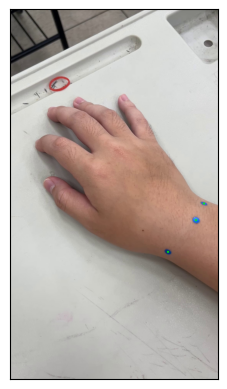

In [53]:
plt.imshow(img[:,:,::-1])
plt.xticks([]), plt.yticks([])
plt.show()

#### Sort the keypoint and give the tags

In [59]:
# detect type of image
# left right top bottom

# find the length of the image
h = img.shape[0] # height
w = img.shape[1] # width

# find the center of the image
cx = w // 2
cy = h // 2

vertical = 0
horizontal = 0

for kp in keypoints:
    if kp[0] > cx:
        horizontal += 1
    
    if kp[1] > cy:
        vertical += 1
    
print('vertical:', vertical)
print('horizontal:', horizontal)

vertical: 3
horizontal: 3


In [62]:
acupoints = {}

## safty check ##
if len(keypoints) != 3:
    print('Error: keypoints are not 3')
    exit()

## WE have to know the left or right hand, front or back of the hand at first
## then we can decide the acupoints

# sample for right hand, back side
if vertical == 3:
    # bottom
    keypoints = sorted(keypoints, key=lambda x: x[0])
    acupoints['陽溪'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽古'] = keypoints[2]
elif vertical == 0:
    # top
    keypoints = sorted(keypoints, key=lambda x: x[0])
    acupoints['陽古'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽溪'] = keypoints[2]
elif horizontal == 3:
    # right
    keypoints = sorted(keypoints, key=lambda x: x[1])
    acupoints['陽古'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽溪'] = keypoints[2]
elif horizontal == 0:
    # left
    keypoints = sorted(keypoints, key=lambda x: x[1])
    acupoints['陽溪'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽古'] = keypoints[2]

print(acupoints)

{'陽溪': (820, 1260), '陽池': (965, 1095), '陽古': (1007, 1009)}


In [ ]:
if